In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
urldata = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/UNB Dataset Features/Address_urldata(Binary).csv")
urldata.head()


,Have IP,Have @,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,Have client,Have admin,...,.txt,.js,.exe,Num of periods,Is encoded,Num of encoded char,Num of parameters,Num of digits,Num of spec char,Label
0,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,18,8,0
1,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,23,9,0
2,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,22,9,0
3,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,18,11,0
4,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,18,9,0


In [4]:
urldata.columns

Index(['Have IP', 'Have @', 'URL Length', 'URL Depth', 'Redirection',
       'https Domain', 'TinyURL', 'Prefix/Suffix', 'Have client', 'Have admin',
       'Have login', 'Have server', '.php', '.html', '.info', '.txt', '.js',
       '.exe', 'Num of periods', 'Is encoded', 'Num of encoded char',
       'Num of parameters', 'Num of digits', 'Num of spec char', 'Label'],
      dtype='object')

In [5]:
urldata.shape

(45343, 25)

In [6]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45343 entries, 0 to 45342
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Have IP              45343 non-null  int64
 1   Have @               45343 non-null  int64
 2   URL Length           45343 non-null  int64
 3   URL Depth            45343 non-null  int64
 4   Redirection          45343 non-null  int64
 5   https Domain         45343 non-null  int64
 6   TinyURL              45343 non-null  int64
 7   Prefix/Suffix        45343 non-null  int64
 8   Have client          45343 non-null  int64
 9   Have admin           45343 non-null  int64
 10  Have login           45343 non-null  int64
 11  Have server          45343 non-null  int64
 12  .php                 45343 non-null  int64
 13  .html                45343 non-null  int64
 14  .info                45343 non-null  int64
 15  .txt                 45343 non-null  int64
 16  .js                  4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

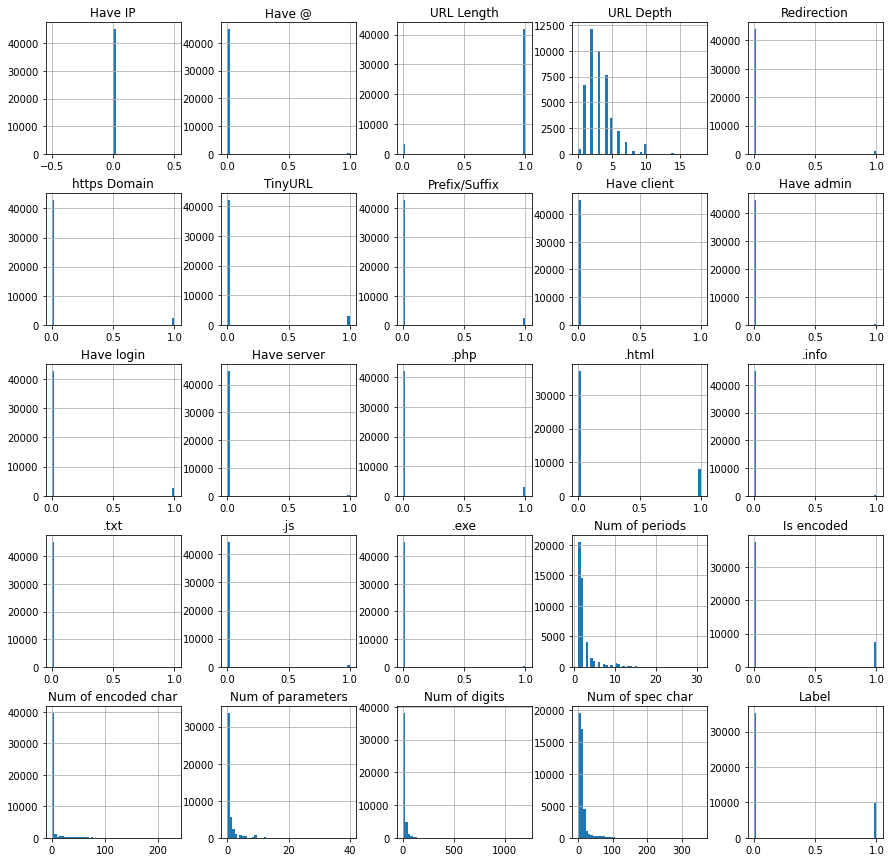

In [8]:
#Plotting the data distribution
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

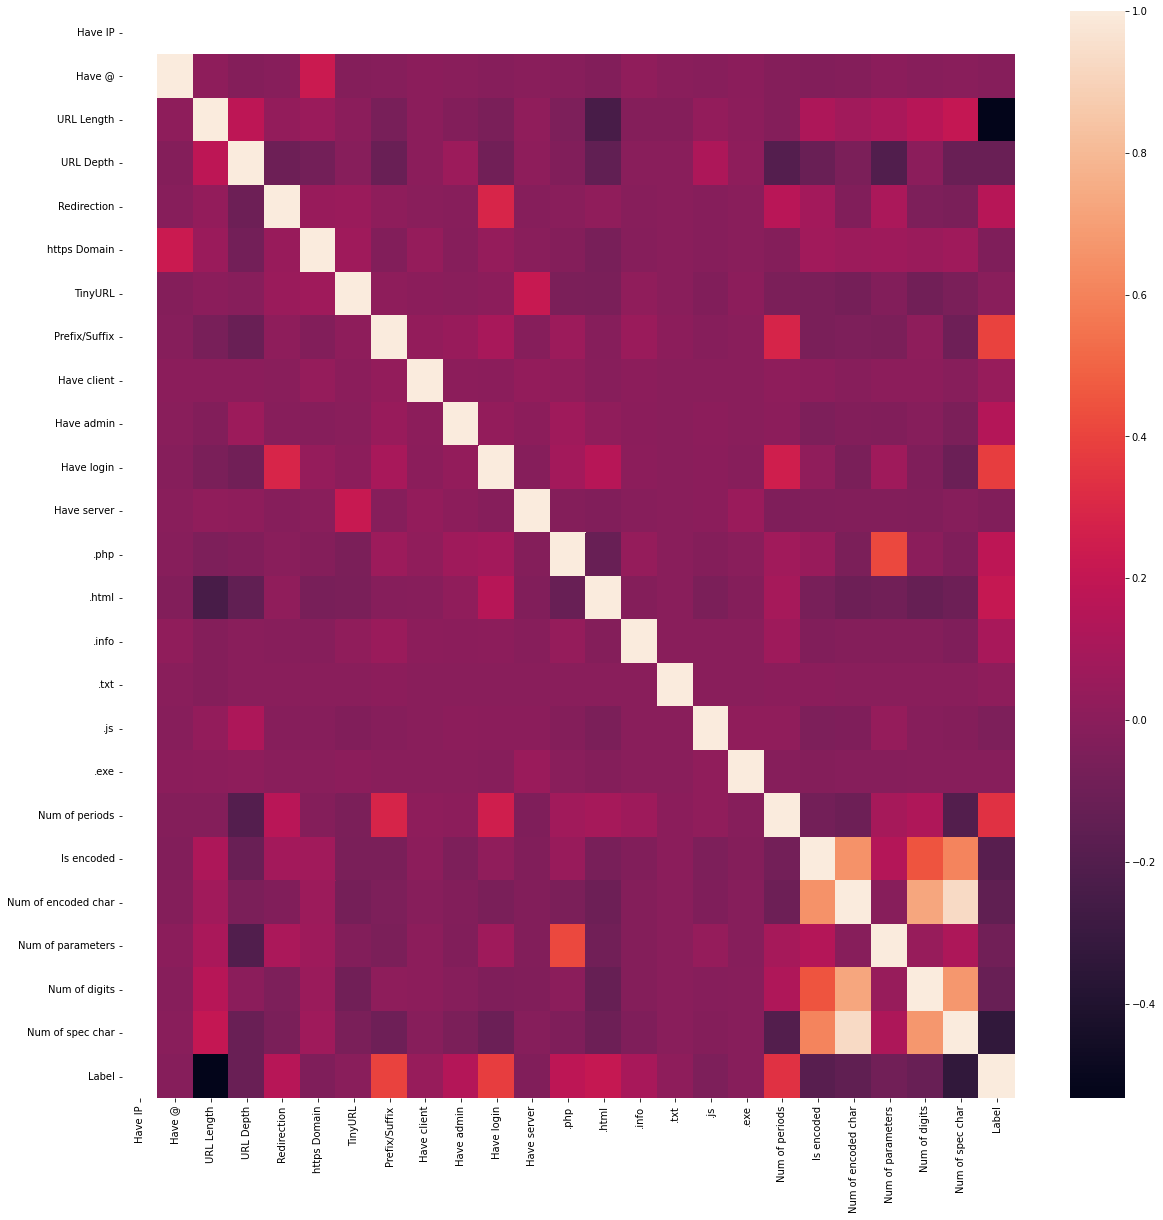

In [9]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(urldata.corr())
plt.show()

In [10]:
urldata.describe()

,Have IP,Have @,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,Have client,Have admin,...,.txt,.js,.exe,Num of periods,Is encoded,Num of encoded char,Num of parameters,Num of digits,Num of spec char,Label
count,45343.0,45343.00000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,...,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000,45343.000000
mean,0.0,0.00483,0.925766,3.209338,0.026112,0.051121,0.068853,0.052599,0.002558,0.010476,...,0.000066,0.018128,0.002646,2.355777,0.167236,4.277705,0.661535,13.717465,11.334958,0.219769
std,0.0,0.06933,0.262154,1.997501,0.159470,0.220248,0.253207,0.223234,0.050515,0.101815,...,0.008134,0.133418,0.051377,2.384857,0.373191,14.513187,1.662218,21.324784,15.067748,0.414095
min,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
50%,0.0,0.00000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,9.000000,0.000000
75%,0.0,0.00000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,18.000000,13.000000,0.000000
max,0.0,1.00000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,31.000000,1.000000,231.000000,40.000000,1204.000000,356.000000,1.000000


In [11]:
#checking the data for null or missing values
urldata.isnull().sum()

Have IP                0
Have @                 0
URL Length             0
URL Depth              0
Redirection            0
https Domain           0
TinyURL                0
Prefix/Suffix          0
Have client            0
Have admin             0
Have login             0
Have server            0
.php                   0
.html                  0
.info                  0
.txt                   0
.js                    0
.exe                   0
Num of periods         0
Is encoded             0
Num of encoded char    0
Num of parameters      0
Num of digits          0
Num of spec char       0
Label                  0
dtype: int64

In [12]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urldata = urldata.sample(frac=1).reset_index(drop=True)
urldata.head()

,Have IP,Have @,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,Have client,Have admin,...,.txt,.js,.exe,Num of periods,Is encoded,Num of encoded char,Num of parameters,Num of digits,Num of spec char,Label
0,0,0,1,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,7,7,0
1,0,0,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,2,1,9,0
2,0,0,1,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,11,0
3,0,0,1,3,0,0,1,0,0,0,...,0,0,0,1,0,0,0,7,8,0
4,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,1,40,0,44,41,0


In [13]:
urldata.shape

(45343, 25)

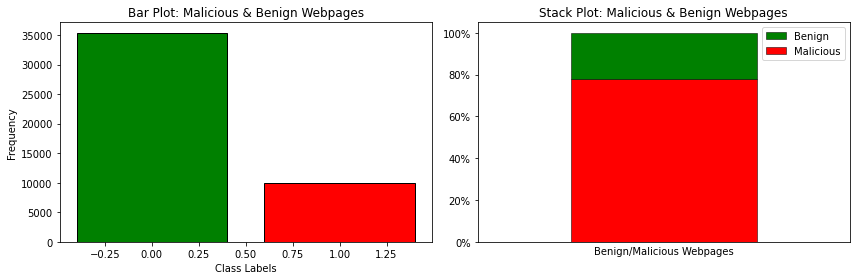

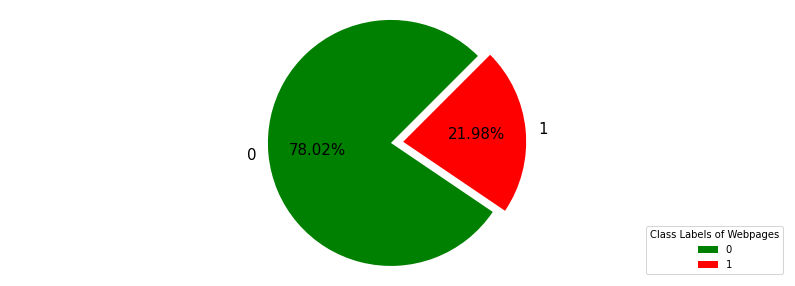

In [14]:
# Bar Plot of Malicious and Benign Websites
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig = plt.figure(figsize = (12,4))
#title = fig.suptitle("Plot of Malicious and Benign Webpages", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
#Bar Plot
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency")
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = urldata['Label'].value_counts()
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)
#Stacked Plot
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text('Stack Plot: Malicious & Benign Webpages')
# create dummy variable then group by that set the legend to false because we'll fix it later
urldata.assign(dummy = 1).groupby(['dummy','Label']).size().groupby(level=0).apply(
                  lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,
                  legend=False,ax=ax2,color={'red','green'}, linewidth=0.50, ec='k')
ax2.set_xlabel('Benign/Malicious Webpages')# or it'll show up as 'dummy'
ax2.set_xticks([])# disable ticks in the x axis
current_handles, _ = plt.gca().get_legend_handles_labels()#Fixing Legend
reversed_handles = reversed(current_handles)
correct_labels = reversed(['Malicious','Benign'])
plt.legend(reversed_handles,correct_labels)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#Saving the Figs
figc = plt.gcf()
plt.tight_layout()
figc.savefig("/content/drive/MyDrive/Phishing/UNB/Binary/Images/ImagesBar Plot & Stack Plot of Malicious & Benign Webpages.svg")
figc.savefig("/content/drive/MyDrive/Phishing/UNB/Binary/Images/Bar Plot & Stack Plot of Malicious & Benign Webpages.png")
# extent = ax1.get_window_extent().transformed(figc.dpi_scale_trans.inverted())
# figc.savefig("/content/drive/MyDrive/Phishing/Images/Bar Plot of Class Labels.png",bbox_inches=extent.expanded(1.2, 1.4))
# extent = ax2.get_window_extent().transformed(figc.dpi_scale_trans.inverted())
# figc.savefig("/content/drive/MyDrive/Phishing/Images/Stack Plot of Class Labels.png",bbox_inches=extent.expanded(1.5, 1.4)


# Pie Chart of Malicious and Benign Webpages Distribution
fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Webpages',loc='lower right')
fig.savefig('/content/drive/MyDrive/Phishing/UNB/Binary/Images/Pie Chart Distribution of Class Labels.svg')
fig.savefig('/content/drive/MyDrive/Phishing/UNB/Binary/Images/Pie Chart Distribution of Class Labels.png')
plt.show()

In [24]:
import numpy as np

# Sepratating & assigning features and target columns to X & y
y = urldata['Label'].values
x = np.array(urldata.drop('Label',axis=1))


print(x.shape, y.shape)


(45343, 24) (45343,)


In [25]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.45, random_state = 12)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)



(24938, 24) (20405, 24)
(24938,) (20405,)


In [26]:
output = {}
output['labels'] = y_test

**DecisionTree Classifier**

In [27]:
import keras

from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

def model_dtc(x_train, x_val, y_train, y_val, opt, n):
  dtcclassifier = DecisionTreeClassifier()
  #compile model using mse as a measure of model performance
  dtcclassifier.fit(x_train, y_train)

  y_pred = dtcclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/DTC/model_'+str(n)+'.h5'
  pickle.dump(dtcclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [28]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_dtc(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9891740176423416
model 0 saved
Validation Accuracy: 0.9891740176423416
model 1 saved
Validation Accuracy: 0.9887730553327987
model 2 saved
Validation Accuracy: 0.9899759422614274
model 3 saved
Validation Accuracy: 0.9867682437850842
model 4 saved
Validation Accuracy: 0.9879711307137129
model 5 saved
Validation Accuracy: 0.9871692060946271
model 6 saved
Validation Accuracy: 0.9899759422614274
model 7 saved
Validation Accuracy: 0.9859606899318091
model 8 saved
Validation Accuracy: 0.9879663056558363
model 9 saved
Average Validation Accuracy: 0.9882908551321407


In [29]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/DTC/model_3.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['dt_prediction_non'] = [i[0] for i in y_pred_prob];
output['dt_prediction_phish'] = [i[1] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


,labels,dt_prediction_non,dt_prediction_phish
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,0,1.0,0.0
4,0,1.0,0.0
...,...,...,...
20400,0,1.0,0.0
20401,0,1.0,0.0
20402,0,1.0,0.0
20403,0,1.0,0.0


**SVC**

In [30]:
import keras

import pickle
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


def model_svc(x_train, x_val, y_train, y_val, opt, n):
  svclassifier = SVC(kernel='rbf', probability= True)
  #compile model using mse as a measure of model performance
  svclassifier.fit(x_train, y_train)

  y_pred = svclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/SVC/model_'+str(n)+'.h5'
  pickle.dump(svclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [33]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_svc(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9611066559743384
model 0 saved
Validation Accuracy: 0.9631114675220529
model 1 saved
Validation Accuracy: 0.9663191659983962
model 2 saved
Validation Accuracy: 0.9635124298315958
model 3 saved
Validation Accuracy: 0.9639133921411387
model 4 saved
Validation Accuracy: 0.96271050521251
model 5 saved
Validation Accuracy: 0.9623095429029671
model 6 saved
Validation Accuracy: 0.9611066559743384
model 7 saved
Validation Accuracy: 0.9703168872843964
model 8 saved
Validation Accuracy: 0.9659045326915363
model 9 saved
Average Validation Accuracy: 0.9640311235533268


In [34]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/SVC/model_8.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['svc_prediction_non'] = [i[0] for i in y_pred_prob];
output['svc_prediction_phish'] = [i[1] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[9.96186959e-01 3.81304111e-03]
 [9.97861814e-01 2.13818605e-03]
 [9.72538856e-01 2.74611438e-02]
 ...
 [9.34489937e-01 6.55100633e-02]
 [9.99735878e-01 2.64121775e-04]
 [9.28574358e-01 7.14256418e-02]]


,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish
0,0,1.0,0.0,0.996187,0.003813
1,0,1.0,0.0,0.997862,0.002138
2,0,1.0,0.0,0.972539,0.027461
3,0,1.0,0.0,0.997957,0.002043
4,0,1.0,0.0,0.992268,0.007732
...,...,...,...,...,...
20400,0,1.0,0.0,0.889475,0.110525
20401,0,1.0,0.0,0.976193,0.023807
20402,0,1.0,0.0,0.934490,0.065510
20403,0,1.0,0.0,0.999736,0.000264


**KNN**

In [35]:
import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def model_knn(x_train, x_val, y_train, y_val, opt, n):
  knnclassifier = KNeighborsClassifier(n_neighbors=5)
  #compile model using mse as a measure of model performance
  knnclassifier.fit(x_train, y_train)

  y_pred = knnclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/KNN/model_'+str(n)+'.h5'
  pickle.dump(knnclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [36]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_knn(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9807538091419407
model 0 saved
Validation Accuracy: 0.9815557337610264
model 1 saved
Validation Accuracy: 0.9807538091419407
model 2 saved
Validation Accuracy: 0.979550922213312
model 3 saved
Validation Accuracy: 0.9799518845228549
model 4 saved
Validation Accuracy: 0.9827586206896551
model 5 saved
Validation Accuracy: 0.9815557337610264
model 6 saved
Validation Accuracy: 0.9851643945469126
model 7 saved
Validation Accuracy: 0.9819494584837545
model 8 saved
Validation Accuracy: 0.9791415964701163
model 9 saved
Average Validation Accuracy: 0.981313596273254


In [37]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/KNN/model_7.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['knn_prediction_non'] = [i[0] for i in y_pred_prob];
output['knn_prediction_phish'] = [i[1] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish
0,0,1.0,0.0,0.996187,0.003813,1.0,0.0
1,0,1.0,0.0,0.997862,0.002138,1.0,0.0
2,0,1.0,0.0,0.972539,0.027461,1.0,0.0
3,0,1.0,0.0,0.997957,0.002043,1.0,0.0
4,0,1.0,0.0,0.992268,0.007732,1.0,0.0
...,...,...,...,...,...,...,...
20400,0,1.0,0.0,0.889475,0.110525,1.0,0.0
20401,0,1.0,0.0,0.976193,0.023807,1.0,0.0
20402,0,1.0,0.0,0.934490,0.065510,1.0,0.0
20403,0,1.0,0.0,0.999736,0.000264,1.0,0.0


**XGB Classifier**

In [38]:
import keras

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def model_xgb(x_train, x_val, y_train, y_val, opt, n):
  xgbclassifier = XGBClassifier(n_neighbors=5)
  #compile model using mse as a measure of model performance
  xgbclassifier.fit(x_train, y_train)

  y_pred = xgbclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/XGBoost/model_'+str(n)+'.h5'
  pickle.dump(xgbclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [39]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_xgb(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9811547714514836
model 0 saved
Validation Accuracy: 0.9819566960705693
model 1 saved
Validation Accuracy: 0.9835605453087409
model 2 saved
Validation Accuracy: 0.9847634322373697
model 3 saved
Validation Accuracy: 0.9851643945469126
model 4 saved
Validation Accuracy: 0.9819566960705693
model 5 saved
Validation Accuracy: 0.9823576583801122
model 6 saved
Validation Accuracy: 0.9863672814755413
model 7 saved
Validation Accuracy: 0.9835539510629764
model 8 saved
Validation Accuracy: 0.9863618130766145
model 9 saved
Average Validation Accuracy: 0.983719723968089


In [40]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/XGBoost/model_7.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['XGB_prediction_non'] = [i[0] for i in y_pred_prob];
output['XGB_prediction_phish'] = [i[1] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[0.9943522  0.00564777]
 [0.9928378  0.00716222]
 [0.90024066 0.09975933]
 ...
 [0.9949564  0.00504364]
 [0.998804   0.00119601]
 [0.96737254 0.03262749]]


,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,0,1.0,0.0,0.996187,0.003813,1.0,0.0,0.994352,0.005648
1,0,1.0,0.0,0.997862,0.002138,1.0,0.0,0.992838,0.007162
2,0,1.0,0.0,0.972539,0.027461,1.0,0.0,0.900241,0.099759
3,0,1.0,0.0,0.997957,0.002043,1.0,0.0,0.993480,0.006520
4,0,1.0,0.0,0.992268,0.007732,1.0,0.0,0.999229,0.000771
...,...,...,...,...,...,...,...,...,...
20400,0,1.0,0.0,0.889475,0.110525,1.0,0.0,0.965443,0.034557
20401,0,1.0,0.0,0.976193,0.023807,1.0,0.0,0.960917,0.039083
20402,0,1.0,0.0,0.934490,0.065510,1.0,0.0,0.994956,0.005044
20403,0,1.0,0.0,0.999736,0.000264,1.0,0.0,0.998804,0.001196


**MLP**

In [41]:
import keras

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def model_mlp(x_train, x_val, y_train, y_val, opt, n):
  mlpclassifier = MLPClassifier(alpha=0.0001, hidden_layer_sizes=([100,100,100]))
  #compile model using mse as a measure of model performance
  mlpclassifier.fit(x_train, y_train)

  y_pred = mlpclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/MLP/model_'+str(n)+'.h5'
  pickle.dump(mlpclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [42]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_mlp(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9879711307137129
model 0 saved
Validation Accuracy: 0.9927826784282278
model 1 saved
Validation Accuracy: 0.9931836407377707
model 2 saved
Validation Accuracy: 0.9911788291900562
model 3 saved
Validation Accuracy: 0.991980753809142
model 4 saved
Validation Accuracy: 0.9891740176423416
model 5 saved
Validation Accuracy: 0.98757016840417
model 6 saved
Validation Accuracy: 0.9935846030473136
model 7 saved
Validation Accuracy: 0.9947853991175291
model 8 saved
Validation Accuracy: 0.9891696750902527
model 9 saved
Average Validation Accuracy: 0.9911380896180516


In [43]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/MLP/model_8.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['mlp_prediction_non'] = [i[0] for i in y_pred_prob];
output['mlp_prediction_phish'] = [i[1] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[9.99993169e-001 6.83087783e-006]
 [9.99999808e-001 1.91996437e-007]
 [9.38091497e-001 6.19085027e-002]
 ...
 [1.00000000e+000 6.78103941e-136]
 [9.99998435e-001 1.56470841e-006]
 [9.99999960e-001 4.02132727e-008]]


,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish,mlp_prediction_non,mlp_prediction_phish
0,0,1.0,0.0,0.996187,0.003813,1.0,0.0,0.994352,0.005648,0.999993,6.830878e-06
1,0,1.0,0.0,0.997862,0.002138,1.0,0.0,0.992838,0.007162,1.000000,1.919964e-07
2,0,1.0,0.0,0.972539,0.027461,1.0,0.0,0.900241,0.099759,0.938091,6.190850e-02
3,0,1.0,0.0,0.997957,0.002043,1.0,0.0,0.993480,0.006520,1.000000,8.912391e-09
4,0,1.0,0.0,0.992268,0.007732,1.0,0.0,0.999229,0.000771,1.000000,4.042073e-45
...,...,...,...,...,...,...,...,...,...,...,...
20400,0,1.0,0.0,0.889475,0.110525,1.0,0.0,0.965443,0.034557,1.000000,1.187514e-07
20401,0,1.0,0.0,0.976193,0.023807,1.0,0.0,0.960917,0.039083,0.998367,1.633400e-03
20402,0,1.0,0.0,0.934490,0.065510,1.0,0.0,0.994956,0.005044,1.000000,6.781039e-136
20403,0,1.0,0.0,0.999736,0.000264,1.0,0.0,0.998804,0.001196,0.999998,1.564708e-06


**Logistic Regression**

In [44]:
import keras

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import pickle

def model_lr(x_train, x_val, y_train, y_val, opt, n):
  lrclassifier = LogisticRegression()
  #compile model using mse as a measure of model performance
  lrclassifier.fit(x_train, y_train)

  y_pred = lrclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/LR/model_'+str(n)+'.h5'
  pickle.dump(lrclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [45]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_lr(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9550922213311949
model 0 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9554931836407378
model 1 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.96271050521251
model 2 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9607056936647955
model 3 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9595028067361668
model 4 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9566960705693665
model 5 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9538893344025662
model 6 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9599037690457097
model 7 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.9494584837545126
model 8 saved
Validation Accuracy: 0.9542719614921781
model 9 saved
Average Validation Accuracy: 0.9567724029849737


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Binary/Models/LR/model_2.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['lr_prediction_non'] = [i[0] for i in y_pred_prob];
output['lr_prediction_phish'] = [i[1] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[9.99739328e-01 2.60671985e-04]
 [9.92760564e-01 7.23943639e-03]
 [9.99983206e-01 1.67941835e-05]
 ...
 [1.00000000e+00 2.28216368e-19]
 [9.98381166e-01 1.61883363e-03]
 [7.59060378e-01 2.40939622e-01]]


,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish,mlp_prediction_non,mlp_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,1.0,0.0,0.996187,0.003813,1.0,0.0,0.994352,0.005648,0.999993,6.830878e-06,0.999739,2.606720e-04
1,0,1.0,0.0,0.997862,0.002138,1.0,0.0,0.992838,0.007162,1.000000,1.919964e-07,0.992761,7.239436e-03
2,0,1.0,0.0,0.972539,0.027461,1.0,0.0,0.900241,0.099759,0.938091,6.190850e-02,0.999983,1.679418e-05
3,0,1.0,0.0,0.997957,0.002043,1.0,0.0,0.993480,0.006520,1.000000,8.912391e-09,0.997774,2.226396e-03
4,0,1.0,0.0,0.992268,0.007732,1.0,0.0,0.999229,0.000771,1.000000,4.042073e-45,0.999999,1.336300e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20400,0,1.0,0.0,0.889475,0.110525,1.0,0.0,0.965443,0.034557,1.000000,1.187514e-07,0.776569,2.234307e-01
20401,0,1.0,0.0,0.976193,0.023807,1.0,0.0,0.960917,0.039083,0.998367,1.633400e-03,0.960932,3.906773e-02
20402,0,1.0,0.0,0.934490,0.065510,1.0,0.0,0.994956,0.005044,1.000000,6.781039e-136,1.000000,2.282164e-19
20403,0,1.0,0.0,0.999736,0.000264,1.0,0.0,0.998804,0.001196,0.999998,1.564708e-06,0.998381,1.618834e-03


In [47]:
output.shape


(20405, 13)

In [48]:
# Storing the data in CSV file
output.to_csv('/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(cross).csv', index=False)